### Question: how many marriages are to be expected for 2016 and 2017 ?

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *
from Starts.startvis import *
%matplotlib inline
rcParams['figure.figsize'] = 15, 6
marriages_1950_2015 = pd.read_csv('./data/marriages_1950_2015.csv')
marriages_1950_2015.set_index('Jahr', inplace=True)

local_kwargs {'data_path_1': './data/marriages_1950_2015.csv', 'data_path_2': './data/marriages_groupby_age2015.csv', 'data_path_3': './data/marriages_groupby_de_1994_2015.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
marriages_1950_2015.head()

,Eheschließungen,Eheschließungen je 1000 Einwohner
Jahr,,
1950,750452,11.0
1951,718166,10.4
1952,659779,9.5
1953,620121,8.9
1954,605392,8.7


### 1. Linear Regression

In [3]:
# from pandas import Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = marriages_1950_2015['Eheschließungen'].values

/usr/local/lib64/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
len(X[0:len(X)-5])+ len(X[len(X)-5:])
X[1:len(X)-5]

array([718166, 659779, 620121, 605392, 617228, 630932, 632659, 648471,
       665844, 689028, 699339, 696317, 655974, 642037, 621130, 606133,
       600247, 563826, 571737, 575233, 562235, 548707, 532022, 516081,
       528811, 510318, 505889, 469278, 481707, 496603, 487832, 486856,
       495392, 498040, 496175, 509320, 523847, 534903, 529597, 516388,
       454291, 453428, 442605, 440244, 430534, 427297, 422776, 417420,
       430674, 418550, 389591, 391963, 382911, 395992, 388451, 373681,
       368922, 377055, 378439, 382047])

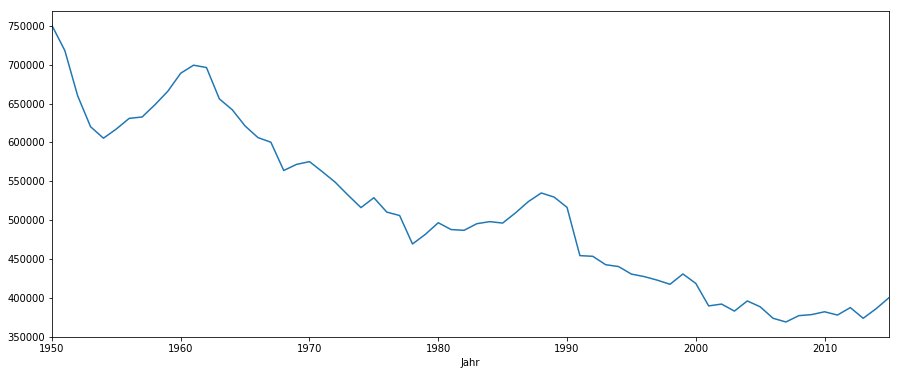

In [5]:
marriages_1950_2015['Eheschließungen'].plot()

In [6]:
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
X_train = marriages_1950_2015['Eheschließungen'].index
y_train = marriages_1950_2015['Eheschließungen'].values
reg_lin.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
X_test_true = marriages_1950_2015['Eheschließungen'].index[60:66]
y_true = marriages_1950_2015['Eheschließungen'].values[60:66]
X_test_true, y_true

(Int64Index([2010, 2011, 2012, 2013, 2014, 2015], dtype='int64', name='Jahr'),
 array([382047, 377816, 387423, 373655, 385952, 400115]))

In [8]:
y_pred_lin = reg_lin.predict(X_test_true.values.reshape(-1,1))
y_pred_lin, y_true

(array([ 368299.21351285,  363073.7975855 ,  357848.38165814,
         352622.96573079,  347397.54980343,  342172.13387607]),
 array([382047, 377816, 387423, 373655, 385952, 400115]))

In [9]:
print(mean_squared_error(y_true, y_pred_lin))


1094526674.25


In [10]:
# predict in year 2016, 2017
X_pred = np.array([[2016], [2017]])
y_pred = reg_lin.predict(X_pred)
y_pred

array([ 336946.71794872,  331721.30202136])

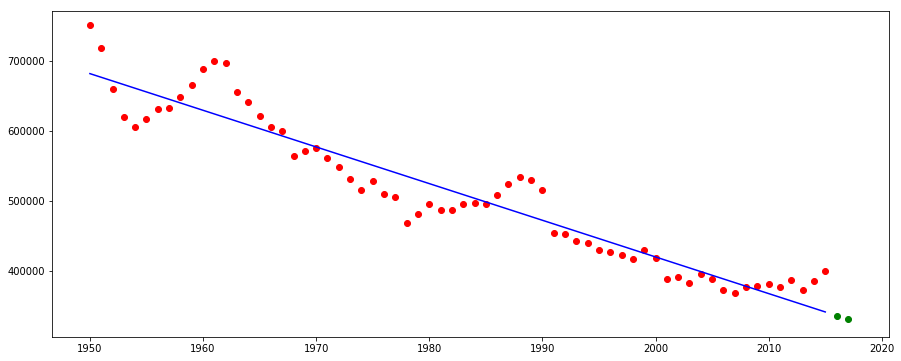

In [11]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred, color='green')
plt.plot(X_train.values, reg_lin.predict(X_train.values.reshape(-1,1)), color = 'blue')

### 2. Decision Tree Regression

In [12]:
reg_dt = DecisionTreeRegressor(random_state=0)
reg_dt.fit(X_train.values.reshape(-1,1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [13]:
y_pred_dt = reg_dt.predict(X_test_true.values.reshape(-1,1))
y_pred_dt, y_true

(array([ 382047.,  377816.,  387423.,  373655.,  385952.,  400115.]),
 array([382047, 377816, 387423, 373655, 385952, 400115]))

In [14]:
print(mean_squared_error(y_true, y_pred_dt))  # Overfitting ?

0.0


In [15]:
# Result
y_pred2 = reg_dt.predict(X_pred)
y_pred2

array([ 400115.,  400115.])

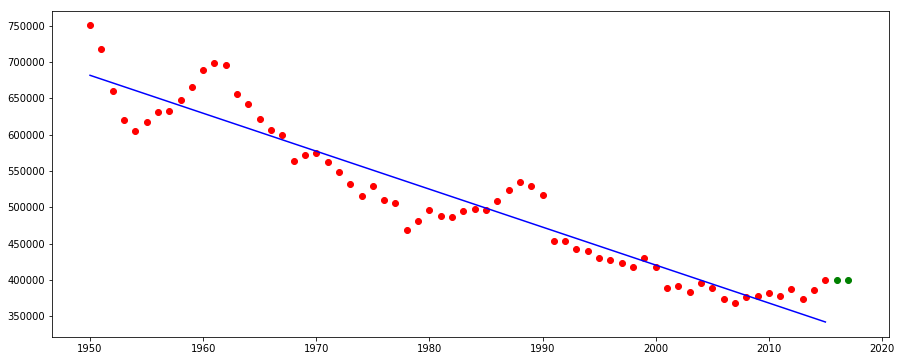

In [16]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred2, color='green')
plt.plot(X_train.values, reg_lin.predict(X_train.values.reshape(-1,1)), color = 'blue')

### 3. Random Forest

In [17]:
reg_rf = RandomForestRegressor(n_estimators=10, random_state=0)
reg_rf.fit(X_train.values.reshape(-1,1), y_train)
reg_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
y_pred_rf = reg_rf.predict(X_test_true.values.reshape(-1,1))
y_pred_rf, y_true

(array([ 381325.4,  380469.1,  383164.1,  376261.5,  382262.9,  390574.1]),
 array([382047, 377816, 387423, 373655, 385952, 400115]))

In [19]:
print(mean_squared_error(y_true, y_pred_rf))  # error too large

22854991.5417


In [20]:
# Result and comparing with the above results
y_pred3 = reg_rf.predict(X_pred)
y_pred3, y_pred2, y_pred

(array([ 390574.1,  390574.1]),
 array([ 400115.,  400115.]),
 array([ 336946.71794872,  331721.30202136]))

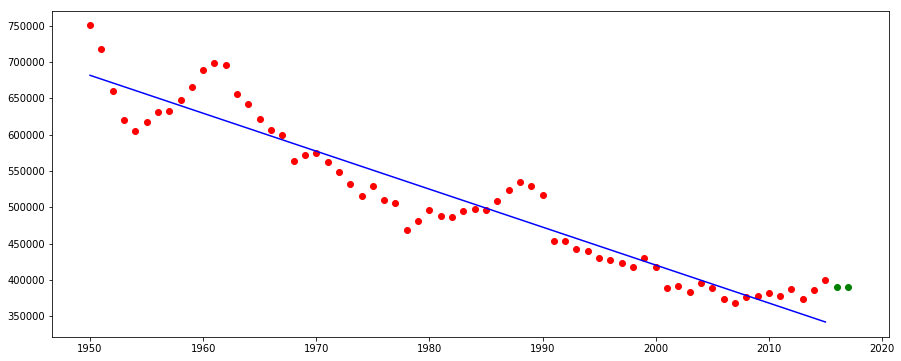

In [21]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred3, color='green')
plt.plot(X_train.values, reg_lin.predict(X_train.values.reshape(-1,1)), color = 'blue')

### Final Result by computing the mean value of all 3 above results 

### (linear regression, decision tree, random forest)

In [22]:
y_pred_mean_2016 = np.mean([y_pred3[0], y_pred2[0], y_pred[0]])
y_pred_mean_2017 = np.mean([y_pred3[1], y_pred2[1], y_pred[1]])
y_pred_final = [y_pred_mean_2016, y_pred_mean_2017]
y_pred_final

[375878.60598290601, 374136.80067378731]

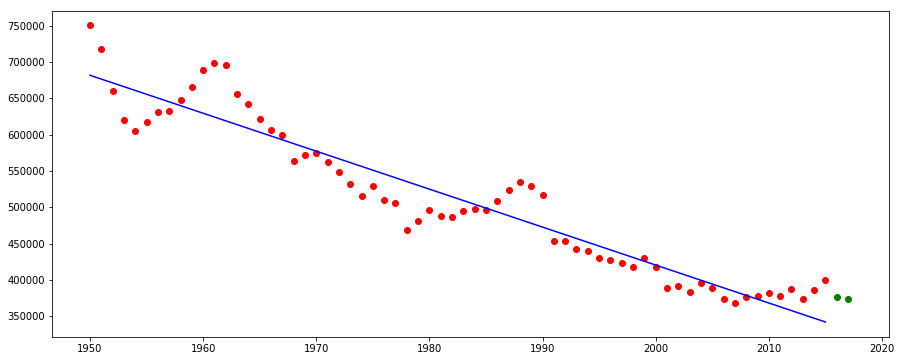

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred_final, color='green')
plt.plot(X_train.values, reg_lin.predict(X_train.values.reshape(-1,1)), color = 'blue')

In [24]:
# StartMod.validation(reg_lin, X_train.values.reshape(-1,1), y_train)
# StartMod.validation(reg_dt, X_train.values.reshape(-1,1), y_train)
# StartMod.validation(reg_rf, X_train.values.reshape(-1,1), y_train)